In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import DA_core as DA
from glob import glob
import matplotlib.animation as animation
from pathlib import Path
import seaborn as sns
from scipy import stats

data_dir='/scratch/cimes/feiyul/PyQG/data'
# data_dir='/work/Feiyu.Lu/PyQG/data'
work_dir='/home/fnl/PyQG/pyqg_experiments/examples/DA'
B_kws={'cmap':'bwr','levels':np.linspace(-0.75E-10,0.75E-10,26),'extend':'both'}
B_kws0={'cmap':'bwr','levels':np.linspace(-2.5E-12,2.5E-12,26),'extend':'both'}

B_kws1={'cmap':'bwr','levels':np.linspace(-0.75E-13,0.75E-13,26),'extend':'both'}
B_ens_kws={'cmap':'bwr','levels':np.linspace(-2.5E-11,2.5E-11,26),'extend':'both'}
B_ens_kws0={'cmap':'bwr','levels':np.linspace(-2.5E-13,2.5E-13,26),'extend':'both'}
B_ens_kws1={'cmap':'bwr','levels':np.linspace(-0.25E-14,0.25E-14,26),'extend':'both'}
q_kws={'cmap':'bwr','levels':np.linspace(-3.4E-5,3.4E-5,18),'extend':'both'}
q_kws1={'cmap':'bwr','levels':np.linspace(-6.8E-7,6.8E-7,18),'extend':'both'}
inc_kws={'cmap':'bwr','levels':np.linspace(-7.5E-6,7.5E-6,16),'extend':'both'}
spread_kws={'cmap':'hot_r','levels':np.linspace(0,20E-6,11),'extend':'both'}

INFO:  Logger initialized


In [2]:
obs_kwargs={'Nx_truth':128,'obs_freq':10,'obs_err':[1,-5,5,-7],'DA_freq':10,'save_B':False,'nobs':[50,50]}

DA_training_paras1={'nens':1280,'DA_method':'EnKF','Nx_DA':32,'R_W':100,'inflate':[1,0.45],**obs_kwargs}
DA_training1=DA.DA_exp(**DA_training_paras1)
training_ens1=DA_training1.nens

DA_training_paras2={'nens':80,'DA_method':'EnKF','Nx_DA':32,'R_W':100,'inflate':[1,0.5],**obs_kwargs}
DA_training2=DA.DA_exp(**DA_training_paras2)
training_ens2=DA_training2.nens

DA_training_paras3={'nens':80,'DA_method':'EnKF','Nx_DA':64,'R_W':100,'inflate':[1,0.5],**obs_kwargs}
DA_training3=DA.DA_exp(**DA_training_paras3)
training_ens3=DA_training3.nens

DA_training_paras4={'nens':1280,'DA_method':'EnKF','Nx_DA':64,'R_W':100,'inflate':[1,0.45],**obs_kwargs}
DA_training4=DA.DA_exp(**DA_training_paras4)
training_ens4=DA_training4.nens

In [14]:
kwargs={'Nx_DA':64,'Nx_truth':128,'training_exp':DA_training3,'training_var':'_2L32f','obs_freq':10,'DA_freq':10,
        'nobs':[50,50],'obs_err':[1,-5,5,-7],'B_alpha':0.0,'R_training':8,'R_DA':8}
kwargs1={'Nx_DA':64,'Nx_truth':128,'training_exp':DA_training2,'training_var':'_2L32f_interp','obs_freq':10,'DA_freq':10,
        'nobs':[50,50],'obs_err':[1,-5,5,-7],'B_alpha':0.0,'R_training':8,'R_DA':8}

exp_set='DA64'

if exp_set=='DA32':
  DA_paras=[{'nens':1,'DA_method':'NoDA','Nx_DA':32,'R_W':50,**kwargs},
            {'nens':1,'DA_method':'3DVar','Nx_DA':32,'R_W':50,**kwargs},
            {'nens':5,'DA_method':'EnKF','Nx_DA':32,'R_W':50,'inflate':[1,0.7],**kwargs},
            {'nens':10,'DA_method':'EnKF','Nx_DA':32,'R_W':75,'inflate':[1,0.65],**kwargs},
            {'nens':20,'DA_method':'EnKF','Nx_DA':32,'R_W':100,'inflate':[1,0.65],**kwargs},
            {'nens':40,'DA_method':'EnKF','Nx_DA':32,'R_W':100,'inflate':[1,0.58],**kwargs},
            {'nens':80,'DA_method':'EnKF','Nx_DA':32,'R_W':100,'inflate':[1,0.5],**kwargs},
            {'nens':1,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.0],**kwargs},
            {'nens':1,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.0],**kwargs1},
            {'nens':5,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.45],**kwargs},
            {'nens':5,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.45],**kwargs1},
            {'nens':10,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.4],**kwargs},
            {'nens':10,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.4],**kwargs1},
            {'nens':20,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.35],**kwargs},
            {'nens':20,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.35],**kwargs1},
            {'nens':40,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.35],**kwargs},
            {'nens':40,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.35],**kwargs1},
            {'nens':80,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.3],**kwargs},
            {'nens':80,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.3],**kwargs1}]
  
elif exp_set=='DA64':
  DA_paras=[{'nens':1,'DA_method':'NoDA','R_W':50,**kwargs},
            {'nens':1,'DA_method':'3DVar','R_W':75,**kwargs},
            {'nens':5,'DA_method':'EnKF','R_W':100,'inflate':[1,0.65],**kwargs},
            {'nens':10,'DA_method':'EnKF','R_W':100,'inflate':[1,0.65],**kwargs},
            {'nens':20,'DA_method':'EnKF','R_W':100,'inflate':[1,0.6],**kwargs},
            {'nens':40,'DA_method':'EnKF','R_W':100,'inflate':[1,0.55],**kwargs},
            {'nens':80,'DA_method':'EnKF','R_W':100,'inflate':[1,0.5],**kwargs},
            {'nens':1,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.0],**kwargs},
            {'nens':1,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.0],**kwargs1},
            {'nens':5,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.4],**kwargs},
            {'nens':5,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.4],**kwargs1},
            {'nens':10,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.4],**kwargs},
            {'nens':10,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.3],**kwargs1},
            {'nens':20,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.4],**kwargs},
            {'nens':20,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.3],**kwargs1},
            {'nens':40,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.4],**kwargs},
            {'nens':40,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.3],**kwargs1},
            {'nens':80,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.35],**kwargs},
            {'nens':80,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.3],**kwargs1}]

elif exp_set=='3DVar':
  DA_paras=[{'nens':1,'DA_method':'NoDA','R_W':50,**kwargs},
            {'nens':1,'DA_method':'3DVar','R_W':50,**kwargs},
            {'nens':1,'DA_method':'3DVar','R_W':5,**kwargs},
            {'nens':1,'DA_method':'3DVar','R_W':10,**kwargs}]
              
elif exp_set=='Compare':
  DA_paras=[{'nens':1,'DA_method':'NoDA','R_W':50,**kwargs},
            {'nens':1,'DA_method':'3DVar','R_W':75,**kwargs},
            {'nens':5,'DA_method':'EnKF','R_W':100,'inflate':[1,0.7],**kwargs},
            {'nens':10,'DA_method':'EnKF','R_W':100,'inflate':[1,0.65],**kwargs},
            {'nens':20,'DA_method':'EnKF','R_W':100,'inflate':[1,0.65],**kwargs},
            {'nens':40,'DA_method':'EnKF','R_W':100,'inflate':[1,0.58],**kwargs},
            {'nens':80,'DA_method':'EnKF','R_W':100,'inflate':[1,0.5],**kwargs},
            {'nens':1,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.0],'B_alpha':0.0,'R_training':8,'R_DA':8,**kwargs},
            {'nens':1,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.0],'B_alpha':0.0,'R_training':8,'R_DA':8,**kwargs1}]

elif exp_set=='Compare64':
  DA_paras=[{'nens':1,'DA_method':'NoDA','R_W':50,**kwargs},
            {'nens':1,'DA_method':'3DVar','R_W':75,**kwargs},
            {'nens':5,'DA_method':'EnKF','R_W':100,'inflate':[1,0.65],**kwargs},
            {'nens':10,'DA_method':'EnKF','R_W':100,'inflate':[1,0.65],**kwargs},
            {'nens':20,'DA_method':'EnKF','R_W':100,'inflate':[1,0.6],**kwargs},
            {'nens':40,'DA_method':'EnKF','R_W':100,'inflate':[1,0.55],**kwargs},
            {'nens':80,'DA_method':'EnKF','R_W':100,'inflate':[1,0.5],**kwargs},
            {'nens':1,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.0],'B_alpha':0.0,'R_training':12,'R_DA':12,**kwargs},
            {'nens':1,'DA_method':'UnetKF','R_W':100,'inflate':[1,0.0],'B_alpha':0.0,'R_training':12,'R_DA':12,**kwargs1}]
   
DA_exps=[]
for DA_para in DA_paras:
    DA_exps.append(DA.DA_exp(**DA_para))
    print(DA_exps[-1].file_name())
colors=sns.color_palette('bright',len(DA_exps))

NoDA_Nx64_from_Nx128_nobs50_50_err1E-5_5E-7
3DVar_Nx64_from_Nx128_freq10_R75_nobs50_50_err1E-5_5E-7
EnKF_Nx64_from_Nx128_ens5_freq10_relax0.65_R100_nobs50_50_err1E-5_5E-7
EnKF_Nx64_from_Nx128_ens10_freq10_relax0.65_R100_nobs50_50_err1E-5_5E-7
EnKF_Nx64_from_Nx128_ens20_freq10_relax0.6_R100_nobs50_50_err1E-5_5E-7
EnKF_Nx64_from_Nx128_ens40_freq10_relax0.55_R100_nobs50_50_err1E-5_5E-7
EnKF_Nx64_from_Nx128_ens80_freq10_relax0.5_R100_nobs50_50_err1E-5_5E-7
UnetKF_Nx64_from_Nx128_ens1_freq10_relax0.0_hybrid0.0_R100_nobs50_50_err1E-5_5E-7
UnetKF_Nx64_from_Nx128_ens1_freq10_relax0.0_hybrid0.0_R100_nobs50_50_err1E-5_5E-7
UnetKF_Nx64_from_Nx128_ens5_freq10_relax0.4_hybrid0.0_R100_nobs50_50_err1E-5_5E-7
UnetKF_Nx64_from_Nx128_ens5_freq10_relax0.4_hybrid0.0_R100_nobs50_50_err1E-5_5E-7
UnetKF_Nx64_from_Nx128_ens10_freq10_relax0.4_hybrid0.0_R100_nobs50_50_err1E-5_5E-7
UnetKF_Nx64_from_Nx128_ens10_freq10_relax0.3_hybrid0.0_R100_nobs50_50_err1E-5_5E-7
UnetKF_Nx64_from_Nx128_ens20_freq10_relax0.4_hybr

In [ ]:
import importlib
importlib.reload(DA)

/scratch/cimes/feiyul/PyQG/data//Obs_Nx128_freq10_nobs50_50_err1E-5_5E-7.nc
/scratch/cimes/feiyul/PyQG/data/NoDA/EnsMean_NoDA_Nx64_from_Nx128_nobs50_50_err1E-5_5E-7.nc
NoDA_Nx64_from_Nx128_nobs50_50_err1E-5_5E-7
[1.4344871e-05 2.8877182e-07]
/scratch/cimes/feiyul/PyQG/data/3DVar/EnsMean_3DVar_Nx64_from_Nx128_freq10_R75_nobs50_50_err1E-5_5E-7.nc
3DVar_Nx64_from_Nx128_freq10_R75_nobs50_50_err1E-5_5E-7
[1.0328374e-05 2.2366008e-07]
/scratch/cimes/feiyul/PyQG/data/EnKF/EnsMean_EnKF_Nx64_from_Nx128_ens5_freq10_relax0.65_R100_nobs50_50_err1E-5_5E-7.nc
EnKF_Nx64_from_Nx128_ens5_freq10_relax0.65_R100_nobs50_50_err1E-5_5E-7
[9.5033611e-06 2.0118999e-07]
[5.0668359e-06 1.1607084e-07]
/scratch/cimes/feiyul/PyQG/data/EnKF/EnsMean_EnKF_Nx64_from_Nx128_ens10_freq10_relax0.65_R100_nobs50_50_err1E-5_5E-7.nc
EnKF_Nx64_from_Nx128_ens10_freq10_relax0.65_R100_nobs50_50_err1E-5_5E-7
[8.6997061e-06 1.8129361e-07]
[6.3776920e-06 1.4549246e-07]
/scratch/cimes/feiyul/PyQG/data/EnKF/EnsMean_EnKF_Nx64_from_Nx128

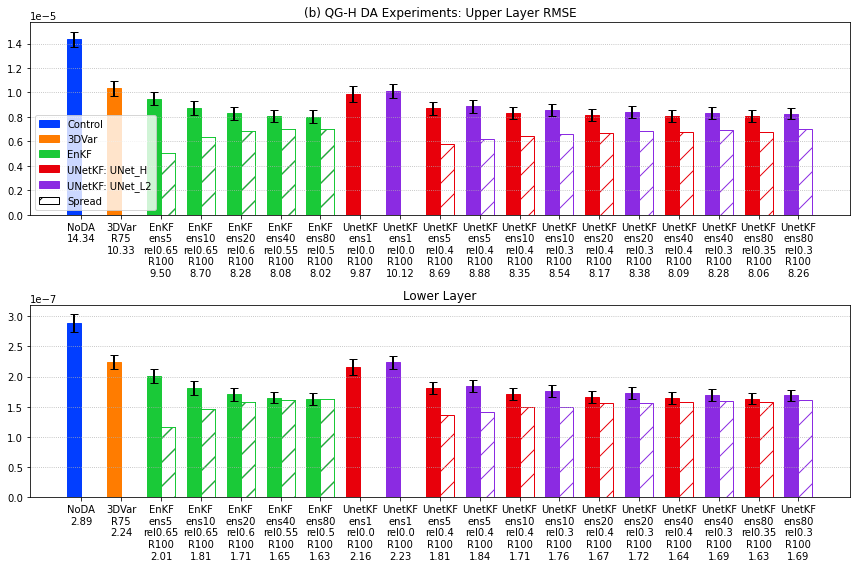

In [15]:
# ds_truth=DA_exps[-1].read_truth(years=10,interp=True)
# q_truth=ds_truth.q.squeeze()
B_ds=xr.open_dataset('{}/B_Nx{}_100years_2lev.nc'.format(data_dir,DA_exps[0].Nx_DA))
ds_obs=DA_exps[-1].read_obs()

days_compute=slice(365*2,365*20)
plot_start=365
fig, axes=plt.subplots(2,1,figsize=(12,8))
rmse=np.empty((len(DA_exps),2))
rmse_std=np.empty((len(DA_exps),2))
spread=np.empty((len(DA_exps),2))
spread_std=np.empty((len(DA_exps),2))

for DA_exp,cl,i in zip(DA_exps,colors,np.arange(len(DA_exps))):
    ds_truth=DA_exp.read_truth(years=20,interp=True)
    q_truth=ds_truth.q.squeeze()
    if DA_exp.DA_method=='UnetKF':
        folder='{}{}'.format(DA_paras[i]['training_exp'].nens,DA_exp.training_var)
    else:
        folder=''
    ds_mean=DA_exp.read_mean(folder=folder)
    if DA_exp.nens>1:  
        ds_std=DA_exp.read_std(folder=folder)
    q_analysis_mean=ds_mean.q_post
    rmse_lev=np.sqrt(((q_analysis_mean-q_truth)**2).mean(axis=(-1,-2)))
    rmse_lev_mean=rmse_lev[days_compute,:].mean(axis=0)
    rmse_lev_std=rmse_lev[days_compute,:].std(axis=0)
    print(DA_exp.file_name())
    print(rmse_lev_mean.data.astype(np.single()))
    rmse[i,:]=rmse_lev_mean.data
    rmse_std[i,:]=rmse_lev_std.data
    # rmse_xy=np.sqrt(((q_analysis_mean-q_truth)**2).mean(axis=(0)))
    if DA_exp.nens>1:
        spread_lev=ds_std.q.mean(('x','y'))
        spread_lev_mean=spread_lev[days_compute,:].mean('time')
        spread_lev_std=spread_lev[days_compute,:].std('time')
        print(spread_lev_mean.data.astype(np.single()))
        spread[i,:]=spread_lev_mean.data
        spread_std[i,:]=spread_lev_std.data
        # spread_xy=ds_std.q.mean(('time'))
    else:
        spread[i,:]=np.nan

    # for i,clim in enumerate([1.5E-5,1.0E-6]):
        # axes[i].plot(np.arange(plot_start,len(q_analysis_mean.time)),rmse_lev[plot_start:,i],'-',color=cl,
        #                label='{:.2E} {}'.format(rmse_lev_mean[i].values,DA_exp.file_name_short()))
        # axes[i].set_title('RMSE (Lev {})'.format(i))
        # im=axes[1,i].contourf(ds_mean.x/1.0E3,ds_mean.y/1.0E3,rmse_xy[i,:,:],extend='max',
        #                       cmap='hot_r',levels=np.linspace(0,clim,11,endpoint=True))
        # axes[1,i].set_title('{} RMSE (Lev {})'.format(DA_exp.DA_method,i))
        # plt.colorbar(im,ax=axes[1,i])

        # if DA_exp.nens>1:
            # axes[i].plot(np.arange(len(q_analysis_mean.time)),spread_lev.isel(lev=i),'--',color=cl,
            #                label='Spread {:.2E} {}'.format(spread_lev_mean[i].values,DA_exp.file_name_short()))
            # im=axes[2,i].contourf(ds_mean.x/1.0E3,ds_mean.y/1.0E3,spread_xy.isel(lev=i),extend='max',
            #                       cmap='hot_r',levels=np.linspace(0,clim,11,endpoint=True))
            # axes[0,i].set_title('{} Spread (Lev {})'.format(DA_exp.DA_method,i))
            # plt.colorbar(im,ax=axes[2,i])
    
    # axes[0].legend()
    # axes[1].legend()

width=0.35
x=np.arange(len(DA_exps))
labels0=[]
labels1=[]
for i,DA_exp in enumerate(DA_exps):
    labels0.append(DA_exp.file_name_label()+'\n{:3.2F}'.format(rmse[i,0]*10E5,DA_exp.training_var[1:]))
    labels1.append(DA_exp.file_name_label()+'\n{:3.2F}'.format(rmse[i,1]*10E6,DA_exp.training_var[1:]))
for i,ax in enumerate(axes):
    if exp_set=='DA32':
        ax.bar(x[0] - width/2,rmse[0,i],width, label='Control',edgecolor=colors[0],color=colors[0])
        # ax.errorbar(x[0] - width/2, rmse[0,i], yerr=rmse_std[0,i], ecolor='black',elinewidth=3,capsize=5)
        
        ax.bar(x[1] - width/2,rmse[1,i],width, label='3DVar',edgecolor=colors[1],color=colors[1])
        # ax.errorbar(x[1] - width/2, rmse[1,i], yerr=rmse_std[1,i], ecolor='black',elinewidth=3,capsize=5)

        ax.bar(x[2:7] - width/2,rmse[2:7,i],width, label='EnKF',edgecolor=colors[2],color=colors[2])
        # ax.errorbar(x[2:7] - width/2, rmse[2:7,i], yerr=rmse_std[2:7,i],ls='',ecolor='black',elinewidth=2,capsize=4)
                
        ind1=[i for i in range(7,18,2)]
        ax.bar(x[ind1] - width/2,rmse[ind1,i],width, label='UNetKF: UNet_L1',edgecolor=colors[3],color=colors[3])
        ax.bar(x[ind1] + width/2,spread[ind1,i],width,edgecolor=colors[3],color=colors[3],fill=False,hatch='/')
        
        ind2=[i for i in range(8,19,2)]
        ax.bar(x[ind2] - width/2,rmse[ind2,i],width, label='UNetKF: UNet_L2',edgecolor=colors[4],color=colors[4])
        ax.bar(x[ind2] + width/2,spread[ind2,i],width,edgecolor=colors[4],color=colors[4],fill=False,hatch='/')

        ax.bar(x[2:7] + width/2,spread[2:7,i],width, label='Spread',edgecolor='k',color='k',fill=False,hatch='/')
        ax.bar(x[2:7] + width/2,spread[2:7,i],width,edgecolor=colors[2],color=colors[2],fill=False,hatch='/')
        
        print(rmse[1,i], rmse_std[1,i], rmse[7,i], rmse_std[7,i])
        print(stats.ttest_ind_from_stats(rmse[1,i], rmse_std[1,i], 365*18, rmse[7,i], rmse_std[7,i], 365*18))
        print(stats.ttest_ind_from_stats(rmse[1,i], rmse_std[1,i], 365*18, rmse[8,i], rmse_std[8,i], 365*18))
        print(stats.ttest_ind_from_stats(rmse[2,i], rmse_std[2,i], 365*18, rmse[9,i], rmse_std[9,i], 365*18))
        print(stats.ttest_ind_from_stats(rmse[2,i], rmse_std[2,i], 365*18, rmse[10,i], rmse_std[10,i], 365*18))
        print(stats.ttest_ind_from_stats(rmse[3,i], rmse_std[3,i], 365*18, rmse[11,i], rmse_std[11,i], 365*18))
        print(stats.ttest_ind_from_stats(rmse[3,i], rmse_std[3,i], 365*18, rmse[12,i], rmse_std[12,i], 365*18))
        print(stats.ttest_ind_from_stats(rmse[4,i], rmse_std[4,i], 365*18, rmse[13,i], rmse_std[13,i], 365*18))
        print(stats.ttest_ind_from_stats(rmse[4,i], rmse_std[4,i], 365*18, rmse[14,i], rmse_std[14,i], 365*18))
    elif exp_set=='DA64':
        ax.bar(x[0] - width/2,rmse[0,i],width, label='Control',edgecolor=colors[0],color=colors[0])

        ax.bar(x[1] - width/2,rmse[1,i],width, label='3DVar',edgecolor=colors[1],color=colors[1])

        ax.bar(x[2:7] - width/2,rmse[2:7,i],width, label='EnKF',edgecolor=colors[2],color=colors[2])
        
        ind1=[i for i in range(7,18,2)]        
        ax.bar(x[ind1] - width/2,rmse[ind1,i],width, label='UNetKF: UNet_H',edgecolor=colors[3],color=colors[3])
        ax.bar(x[ind1] + width/2,spread[ind1,i],width,edgecolor=colors[3],color=colors[3],fill=False,hatch='/')
        
        ind2=[i for i in range(8,19,2)]
        ax.bar(x[ind2] - width/2,rmse[ind2,i],width, label='UNetKF: UNet_L2',edgecolor=colors[4],color=colors[4])
        ax.bar(x[ind2] + width/2,spread[ind2,i],width,edgecolor=colors[4],color=colors[4],fill=False,hatch='/')
        
        ax.bar(x[2:7] + width/2,spread[2:7,i],width, label='Spread',edgecolor='k',color='k',fill=False,hatch='/')
        ax.bar(x[2:7] + width/2,spread[2:7,i],width,edgecolor=colors[2],color=colors[2],fill=False,hatch='/')
    # elif exp_set=='UnetCompare':
    #     ax.bar(x[[0,4,8]] - width/2,rmse[[0,4,8],i],width, label=DA_exps[0].training_var[1:],edgecolor=colors[0],color=colors[0])
    #     ax.bar(x[[0,4,8]] + width/2,spread[[0,4,8],i],width,edgecolor=colors[0],color=colors[0],fill=False,hatch='/')
        
    #     ax.bar(x[[1,5,9]] - width/2,rmse[[1,5,9],i],width, label=DA_exps[1].training_var[1:],edgecolor=colors[1],color=colors[1])
    #     ax.bar(x[[1,5,9]] + width/2,spread[[1,5,9],i],width,edgecolor=colors[1],color=colors[1],fill=False,hatch='/')
        
    #     ax.bar(x[[2,6,10]] - width/2,rmse[[2,6,10],i],width, label=DA_exps[2].training_var[1:],edgecolor=colors[2],color=colors[2])
    #     ax.bar(x[[2,6,10]] + width/2,spread[[2,6,10],i],width,edgecolor=colors[2],color=colors[2],fill=False,hatch='/')
        
    #     ax.bar(x[[3,7,11]] - width/2,rmse[[3,7,11],i],width, label=DA_exps[3].training_var[1:],edgecolor=colors[3],color=colors[3])
    #     ax.bar(x[[3,7,11]] + width/2,spread[[3,7,11],i],width,edgecolor=colors[3],color=colors[3],fill=False,hatch='/')        
    else:
        ax.bar(x - width/2,rmse[:,i],width)
        ax.bar(x + width/2,spread[:,i],width)
        
    ax.errorbar(x[0:len(rmse_std[:,i])] - width/2, rmse[:,i], yerr=rmse_std[:,i],ls='',ecolor='black',elinewidth=2,capsize=4)
    ax.grid(which='both',axis='y',linestyle=':')
    if i==0:
        ax.legend() 
        
axes[0].set_title('(b) QG-H DA Experiments: Upper Layer RMSE')
axes[1].set_title('Lower Layer')
axes[0].set_xticks(x, labels0)
axes[1].set_xticks(x, labels1)
        
fig.tight_layout()
fig.savefig('./plots/RMSE_Spread_{}_TrainEns{}{}_DA{}_Truth{}_nobs{}.png'.\
    format(exp_set,kwargs['training_exp'].nens,kwargs['training_var'],DA_exps[-1].Nx_DA,DA_exps[-1].Nx_truth,'_'.join(map(str,DA_exps[-1].nobs))))

In [6]:
DA.read_data_dir='/scratch/cimes/feiyul/PyQG/data/training'
DA.save_data_dir='/scratch/cimes/feiyul/PyQG/data/training'
DA_training_paras={'nens':1280,
                   'DA_method':'EnKF',
                   'Nx_DA':64,
                   'Nx_truth':128,
                   'obs_freq':10,
                   'obs_err':[1,-5,5,-7],
                   'DA_freq':10,
                   'save_B':False,
                   'nobs':[50,50],
                   'R_W':100,
                   'inflate':[1,0.45],
                   'training_exp':DA_training1,
                   'training_var':'_3L8f',
                   'B_alpha':0.0,
                   'R_training':8,
                   'R_DA':8}
DA_training=DA.DA_exp(**DA_training_paras)

ds_truth=DA_training.read_truth(years=10,interp=True)
q_truth=ds_truth.q.squeeze()
if DA_training.DA_method=='UnetKF':
    folder='{}{}'.format(DA_training_paras['training_exp'].nens,DA_training.training_var)
else:
    folder=''
ds_mean=DA_training.read_mean(folder=folder)
rmse_lev=np.sqrt(((ds_mean.q_post-q_truth)**2).mean(axis=(-1,-2)))
print(rmse_lev.isel(time=slice(730,None)).mean('time'))

if DA_training_paras['nens']>1:
    ds_std=DA_training.read_std()
    spread_lev=ds_std.q.mean(('x','y'))
    print(spread_lev.isel(time=slice(73,None)).mean('time'))


NameError: name 'DA_training1' is not defined

Nx_truth 64
NoDA [1.2792072e-05 2.8608397e-07]

3DVar 
R25 [6.0717052e-06 1.6883095e-07]
R50 [5.1855136e-06 1.5625071e-07]
R100 [5.8226915e-06 1.6983651e-07]
R150 [6.0276134e-06 1.7305297e-07]

EnKF
50
R150 0.7
[2.9184437e-06 7.3589426e-08]
[3.2488447e-06 7.0400063e-08]

500
R150 0.4
[1.9683214e-06 4.0464720e-08]
[2.2011977e-06 4.5205457e-08]

UnetKF
[4.8861693e-06 1.2738903e-07]

In [ ]:
B_ens_mean_ds=xr.open_dataset('{}/{}/B_ens_mean.nc'.format(data_dir,DA_exp.file_name()))
B_ens_mean=B_ens_mean_ds.B_ens

i_x,i_y=30,20
B_loc=int((len(B_ens_mean.x_d)-1)/2)

fig, axes=plt.subplots(2,3,figsize=(15,8))
xy0=i_x+i_y*DA_exp.Nx_DA
xy1=i_x+i_y*DA_exp.Nx_DA+DA_exp.Nx_DA*DA_exp.Nx_DA
cov_xy0=B_ds.cov.data[xy0,:].reshape(2,DA_exp.Nx_DA,DA_exp.Nx_DA)
cov_xy1=B_ds.cov.data[xy1,:].reshape(2,DA_exp.Nx_DA,DA_exp.Nx_DA)
x_loc=np.arange(-B_loc,B_loc+1)
y_loc=np.arange(-B_loc,B_loc+1)

im=axes[0,0].contourf(x_loc,y_loc,cov_xy0[0,i_y-B_loc:i_y+B_loc+1,i_x-B_loc:i_x+B_loc+1],**B_kws)
plt.colorbar(im,ax=axes[0,0])
axes[0,0].set_title('Lev 0-0 cov (y={},x={})'.format(i_y,i_x))

im=axes[0,1].contourf(x_loc,y_loc,cov_xy0[1,i_y-B_loc:i_y+B_loc+1,i_x-B_loc:i_x+B_loc+1],**B_kws0)
plt.colorbar(im,ax=axes[0,1])
axes[0,1].set_title('Lev 0-1 cov (y={},x={})'.format(i_y,i_x))

im=axes[0,2].contourf(x_loc,y_loc,cov_xy1[1,i_y-B_loc:i_y+B_loc+1,i_x-B_loc:i_x+B_loc+1],**B_kws1)
plt.colorbar(im,ax=axes[0,2])
axes[0,2].set_title('Lev 1-1 cov (y={},x={})'.format(i_y,i_x))

im=axes[1,0].contourf(x_loc,y_loc,B_ens_mean.isel(x=i_x,y=i_y,lev=0,lev_d=0).squeeze(),**B_ens_kws)
plt.colorbar(im,ax=axes[1,0])
axes[1,0].set_title('Lev 0-0 ens cov (y={},x={})'.format(i_y,i_x))

im=axes[1,1].contourf(x_loc,y_loc,B_ens_mean.isel(x=i_x,y=i_y,lev=0,lev_d=1).squeeze(),**B_ens_kws0)
plt.colorbar(im,ax=axes[1,1])
axes[1,1].set_title('Lev 0-1 ens cov (y={},x={})'.format(i_y,i_x))

im=axes[1,2].contourf(x_loc,y_loc,B_ens_mean.isel(x=i_x,y=i_y,lev=1,lev_d=1).squeeze(),**B_ens_kws1)
plt.colorbar(im,ax=axes[1,2])
axes[1,2].set_title('Lev 1-1 ens cov (y={},x={})'.format(i_y,i_x))

In [ ]:
def plot_B(t,axes):
    t_DA=int((t-9)/10)
    # im=[[0,0,0],[0,0,0]]
    im=[[0,0],[0,0]]
    xy=i_x+i_y*DA_exp.Nx_DA+i_l*DA_exp.Nx_DA*DA_exp.Nx_DA
    cov_xy=xr.DataArray(B_ds.cov.data[xy,:].reshape(2,DA_exp.Nx_DA,DA_exp.Nx_DA),
                        coords=[B_ens_ds.lev,B_ens_ds.y,B_ens_ds.x])
    B_R=int((len(B_ens_ds.x_d)-1)/2)
    
    # cov_loc=DA.localize_q(cov_xy,i_y,i_x,DA_exp.Nx_DA,B_R)
    # im[1][1]=axes[1,1].contourf(B_ens_ds.x_d,B_ens_ds.y_d,
    #                             cov_loc[i_l,:,:],**B_kws)
    # axes[1,1].set_title('Static B{}'.format(i_l))

    im[0][1]=axes[0,1].contourf(B_ens_ds.x_d,B_ens_ds.y_d,
                            B_ens_ds.B_ens.isel(time=t_DA,x=i_x,y=i_y,lev=i_l,lev_d=i_l),
                            **B_ens_kws)
    axes[0,1].set_title('Ensemble Covariance'.format(i_l))

    t_day=t
    q_loc=DA.localize_q(ds_mean.q_post.isel(time=t_day,lev=i_l),i_y,i_x,DA_exp.Nx_DA,B_R)
    im[0][0]=axes[0,0].contourf(B_ens_ds.x_d,B_ens_ds.y_d,q_loc,**q_kws)
    axes[0,0].set_title('Analysis q (lev={},y={},x={})'.format(i_l,i_y,i_x))
    
    q_truth=DA.localize_q(ds_truth.q.isel(time=t_day,lev=i_l).squeeze(),i_y,i_x,DA_exp.Nx_DA,B_R)
    im[1][0]=axes[1,0].contourf(B_ens_ds.x_d,B_ens_ds.y_d,q_truth,**q_kws)
    axes[1,0].set_title('True q (subsampled)')

#     q_spread=DA.localize_q(ds_std.q.isel(time=t_day,lev=i_l),i_y,i_x,DA_exp.Nx_DA,B_R)
#     im[1][2]=axes[1,2].contourf(B_ens_ds.x_d,B_ens_ds.y_d,q_spread,**spread_kws)
#     axes[1,2].set_title('Spread q')
    
    q_inc=DA.localize_q(ds_mean.q_post.isel(time=t_day,lev=i_l),i_y,i_x,DA_exp.Nx_DA,B_R)-\
        DA.localize_q(ds_mean.q.isel(time=t_day,lev=i_l),i_y,i_x,DA_exp.Nx_DA,B_R)
    im[1][1]=axes[1,1].contourf(B_ens_ds.x_d,B_ens_ds.y_d,q_inc,**inc_kws)
    axes[1,1].set_title('Increments')
    
#     for ax in axes.flatten():
#         xt_lim=int(B_R/4)*4
#         ax.set_xticks(np.arange(-xt_lim,xt_lim+1,4).astype(np.int_))
#         ax.set_yticks(np.arange(-xt_lim,xt_lim+1,4).astype(np.int_))
#         ax.grid(linestyle=':')
        
    obs_day=t
    # obs_li=ds_obs.li.isel(time=obs_day).data
    obs_x=ds_obs.x[ds_obs.xi.sel(day=obs_day).data]
    obs_y=ds_obs.y[ds_obs.yi.sel(day=obs_day).data]
    x_DA,y_DA=ds_mean.x,ds_mean.y
    x_d=x_DA[1]-x_DA[0]
    y_d=y_DA[1]-y_DA[0]
    x_DA_ex=np.concatenate((np.array([x_DA[0]-x_d]),x_DA,np.array([x_DA[-1]+x_d])))
    y_DA_ex=np.concatenate((np.array([y_DA[0]-y_d]),y_DA,np.array([y_DA[-1]+y_d])))
    obs_xi=np.interp(obs_x,x_DA_ex,np.arange(-1,DA_exp.Nx_DA+1))
    obs_yi=np.interp(obs_y,y_DA_ex,np.arange(-1,DA_exp.Nx_DA+1))
    obs_domain=np.logical_and(np.logical_and(obs_xi >= i_x-B_R,obs_xi <= i_x+B_R),
                              np.logical_and(obs_yi >= i_y-B_R,obs_yi <= i_y+B_R))
    if np.any(obs_domain):
        axes[1,1].scatter(obs_xi[obs_domain]-i_x,obs_yi[obs_domain]-i_y,c='k')
        
    return im

def plot_q(t,axes):
    im=[[0,0],[0,0]]
    
    q_truth0=ds_truth.q.isel(time=t,lev=0).squeeze()
    im[0][0]=axes[0,0].contourf(q_truth.x/1000,q_truth.y/1000,q_truth0,**q_kws)
    axes[0,0].set_title('True q0')
           
    q_truth1=ds_truth.q.isel(time=t,lev=1).squeeze()
    im[0][1]=axes[0,1].contourf(q_truth.x/1000,q_truth.y/1000,q_truth1,**q_kws1)
    axes[0,1].set_title('True q1')

    q_mean0=ds_mean.q.isel(time=t,lev=0).squeeze()
    im[1][0]=axes[1,0].contourf(q_truth.x/1000,q_truth.y/1000,q_mean0,**q_kws)
    axes[1,0].set_title('Analysis q0')
           
    q_mean1=ds_mean.q.isel(time=t,lev=1).squeeze()
    im[1][1]=axes[1,1].contourf(q_truth.x/1000,q_truth.y/1000,q_mean1,**q_kws1)
    axes[1,1].set_title('Analysis q1')
    
    return im

def compare_B(t,axes):
    im=[[0,0,0],[0,0,0],[0,0,0]]
    t_DA=int((t-9)/10)
    B_ens=B_ens_ds.B_ens.isel(time=t_DA,x=i_x,y=i_y,lev=i_l,lev_d=i_l)
    im[0][0]=axes[0,0].contourf(B_ens_ds.x_d,B_ens_ds.y_d,B_ens,**B_ens_kws)
    axes[0,0].set_title('Ens Cov {}'.format(i_l))

    t_day=t
    q_inst=DA.localize_q(ds_mean.q_post.isel(time=t_day,lev=i_l),i_y,i_x,DA_exp.Nx_DA,B_R)
    im[1][0]=axes[1,0].contourf(B_ens_ds.x_d,B_ens_ds.y_d,q_inst,**q_kws)
    axes[1,0].set_title('Ensemble-mean q')

    q_inc=DA.localize_q(ds_mean.q_post.isel(time=t_day,lev=i_l),i_y,i_x,DA_exp.Nx_DA,B_R)-\
        DA.localize_q(ds_mean.q.isel(time=t_day,lev=i_l),i_y,i_x,DA_exp.Nx_DA,B_R)
    im[2][0]=axes[2,0].contourf(B_ens_ds.x_d,B_ens_ds.y_d,q_inc,**inc_kws)
    axes[2,0].set_title('q inc')

    # obs_day=t_day
    # # obs_li=ds_obs.li.isel(time=obs_day).data
    # obs_x=ds_obs.x[ds_obs.xi.sel(day=obs_day).data]
    # obs_y=ds_obs.y[ds_obs.yi.sel(day=obs_day).data]
    # x_DA,y_DA=ds_mean.x,ds_mean.y
    # x_d=x_DA[1]-x_DA[0]
    # y_d=y_DA[1]-y_DA[0]
    # x_DA_ex=np.concatenate((np.array([x_DA[0]-x_d]),x_DA,np.array([x_DA[-1]+x_d])))
    # y_DA_ex=np.concatenate((np.array([y_DA[0]-y_d]),y_DA,np.array([y_DA[-1]+y_d])))
    # obs_xi=np.interp(obs_x,x_DA_ex,np.arange(-1,Nx_DA+1))
    # obs_yi=np.interp(obs_y,y_DA_ex,np.arange(-1,Nx_DA+1))
    # obs_domain=np.logical_and(np.logical_and(obs_xi >= i_x-B_R,obs_xi <= i_x+B_R),
    #                           np.logical_and(obs_yi >= i_y-B_R,obs_yi <= i_y+B_R))
    # if np.any(obs_domain):
    #     axes[2,0].scatter(obs_xi[obs_domain]-i_x,obs_yi[obs_domain]-i_y,c='k')

    for i,lag in enumerate([30,20,10]):
        q_truth=DA.localize_q(ds_truth.q.isel(time=slice(t_day-lag,t_day+1),lev=i_l).squeeze(),i_y,i_x,DA_exp.Nx_DA,B_R)
        q_mean=DA.localize_q(ds_mean.q.isel(time=slice(t_day-lag,t_day+1),lev=i_l),i_y,i_x,DA_exp.Nx_DA,B_R)

        cov_truth=((q_truth.isel(x=B_R,y=B_R)-q_truth.isel(x=B_R,y=B_R).mean('time'))*(q_truth-q_truth.mean('time'))).sum('time')/(lag-1)
        im[i][1]=axes[i,1].contourf(B_ens_ds.x_d,B_ens_ds.y_d,cov_truth,**B_ens_kws)
        axes[i,1].set_title('Cov Truth (Trailing {}d)'.format(lag))

        cov_mean=((q_mean.isel(x=B_R,y=B_R)-q_mean.isel(x=B_R,y=B_R).mean('time'))*(q_mean-q_mean.mean('time'))).sum('time')/(lag-1)
        im[i][2]=axes[i,2].contourf(B_ens_ds.x_d,B_ens_ds.y_d,cov_mean,**B_ens_kws)
        axes[i,2].set_title('Cov Analysis (Trailing {}d)'.format(lag))
        
    for ax in axes.flatten():
        xt_lim=int(B_R/4)*4
        ax.set_xticks(np.arange(-xt_lim,xt_lim+1,4).astype(np.int_))
        ax.set_yticks(np.arange(-xt_lim,xt_lim+1,4).astype(np.int_))
        ax.grid(linestyle=':')

    return im

def animate_B(t,axes,func):
    for ax in axes.flatten():
        ax.clear()
        ax.set_title('')
    im=func(t,axes)
    
    return im

def colorbar_list_of_lists(im,axes):
    for i,sub_list in enumerate(im):
            for j,sub_item in enumerate(sub_list):
                    if sub_item!=0:
                            plt.colorbar(sub_item,ax=axes[i,j])

In [ ]:
# DA_exp=DA_exps[1]
paras={'nens':1280,'DA_method':'EnKF','Nx_DA':32,'Nx_truth':128,'obs_freq':10,'obs_err':[1,-6,5,-8],'nobs':[100,20],'R_W':100,'DA_freq':10,'inflate':[1,0.7]}
DA_exp=DA.DA_exp(**paras)
B_ens_ds=xr.open_dataset('{}/training/{}/B_ens.nc'.format(data_dir,DA_exp.file_name()))
B_ds=xr.open_dataset('{}/B_Nx{}_100years_2lev.nc'.format(data_dir,DA_exp.Nx_DA))
ds_truth=DA_exp.read_truth(years=10,interp=True)
ds_mean=DA_exp.read_mean()
ds_std=DA_exp.read_std()
ds_obs=DA_exp.read_obs()
fig, axes=plt.subplots(2,2,figsize=(10,8))

i_x=15
i_y=10
i_l=0
im=plot_B(2009,axes)
colorbar_list_of_lists(im,axes)

ani = animation.FuncAnimation(fig, animate_B, frames=np.arange(2009,3000,10), 
    fargs=(axes,plot_B,), interval=200)

ani.save("./plots/B_small_x{}y{}l{}_{}.gif".format(i_x,i_y,i_l,DA_exp.file_name()))

In [ ]:
DA_days=np.arange(9,3650,10)
B_ens_ds=xr.open_mfdataset(['{}/{}/B_ens_day{:04d}.nc'.format(data_dir,DA_exp.file_name(),day) for day in np.arange(9,3650,10)])
Path('{}/plots/{}'.format(work_dir,DA_exp.file_name())).mkdir(exist_ok=True)
print(B_ens_ds)
func=plot_B
func_str='ens'

for i_x,i_y,i_l in zip([30,30,30],[12,24,36],[0,0,0]):
    B_R=int((len(B_ens_ds.x_d)-1)/2)

    fig, axes=plt.subplots(2,3,figsize=(15,8))

    im=func(729,axes)
    colorbar_list_of_lists(im,axes)

    ani = animation.FuncAnimation(fig, animate_B, frames=DA_days, 
        fargs=(axes,func,), interval=100)

    ani.save("./plots/{}/B_{}_x{}_y{}_l{}.gif".format(DA_exp.file_name(),func_str,i_x,i_y,i_l))

/home/feiyul/PyQG/pyqg_experiments/examples/DA/ML/EnKF_Nx32_from_Nx128_ens1280_freq10_relax0.45_R100_nobs50_50_err1E-5_5E-7/2L16f/slurm-801854.out
454
[0.7153, 0.4767, 0.4393, 0.4151, 0.3945, 0.381, 0.3663, 0.3507, 0.3449, 0.3359, 0.3295, 0.3241, 0.3219, 0.3159, 0.3119, 0.3104, 0.3074, 0.3048, 0.3066, 0.3018, 0.3103, 0.3004, 0.2969, 0.3032, 0.2955, 0.2912, 0.2925, 0.2895, 0.2887, 0.2969, 0.2856, 0.2866, 0.284, 0.2982, 0.2824, 0.2832, 0.2822, 0.2814, 0.2802, 0.286, 0.2789, 0.2782, 0.2791, 0.2806, 0.2774, 0.2941, 0.2782, 0.2777, 0.2817, 0.2758, 0.2757, 0.2745, 0.2848, 0.2739, 0.2846, 0.2735, 0.2744, 0.2781, 0.2777, 0.2739, 0.2724, 0.2742, 0.2754, 0.2737, 0.2729, 0.273, 0.2733, 0.2725, 0.2717, 0.2732, 0.2727, 0.2725, 0.2728, 0.2754, 0.2711, 0.2752, 0.2713, 0.2728, 0.2711, 0.2704, 0.2707, 0.2728, 0.2723, 0.2714, 0.2727, 0.2706, 0.2703, 0.2714, 0.2693, 0.2734, 0.27, 0.2703, 0.2699, 0.2726, 0.27, 0.2724, 0.2708, 0.2717, 0.2692, 0.272, 0.2719, 0.2715, 0.27, 0.273, 0.2698, 0.2695, 0.2704, 0.27

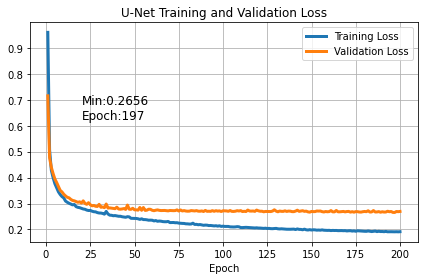

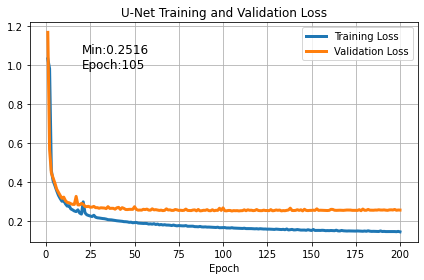

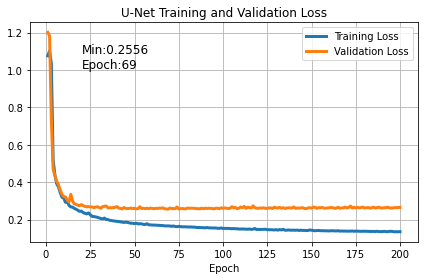

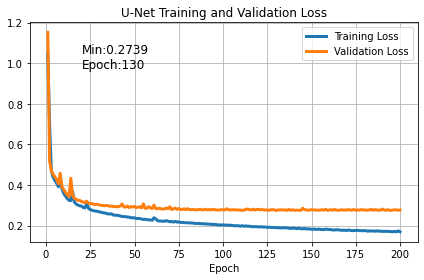

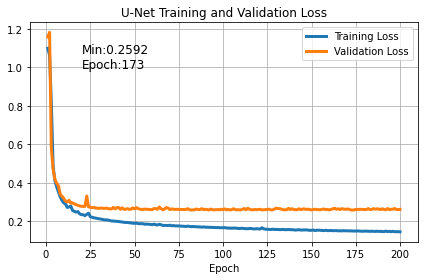

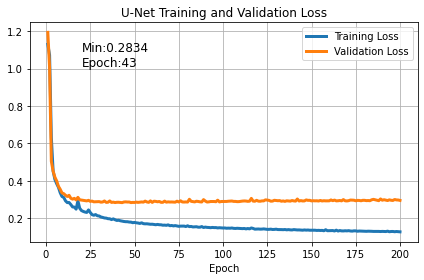

In [2]:
for Ulevels,features in zip([2,2,2,3,3,3],[16,32,64,16,32,64]):
    DA_training_paras={'nens':1280,
                    'DA_method':'EnKF',
                    'Nx_DA':32,
                    'Nx_truth':128,
                    'obs_freq':10,
                    'obs_err':[1,-5,5,-7],
                    'DA_freq':10,
                    'save_B':False,
                    'nobs':[50,50],
                    'R_W':100,
                    'inflate':[1,0.45]}
    DA_training=DA.DA_exp(**DA_training_paras)
    ml_dir='/home/feiyul/PyQG/pyqg_experiments/examples/DA/ML/'+DA_training.file_name()
    stdout_file=glob('{}/{}L{}f/slurm-??????.out'.format(ml_dir,Ulevels,features))[0]
    print(stdout_file)
    with open(stdout_file) as f:
        for count, line in enumerate(f):
            pass
    print(count)
    with open(stdout_file) as f:
        train_loss=[float(line.split()[5][7:-1]) for line in f.readlines()[count-399::2]]
    with open(stdout_file) as f:
        valid_loss=[float(line.split()[2][7:-1]) for line in f.readlines()[count-398::2]]

    # with open('/home/feiyul/PyQG/pyqg_experiments/examples/DA/ML/EnKF_Nx32_from_Nx128_ens80_freq10_relax0.72_R100_nobs100_20_err1E-6_5E-8/slurm-219462.out') as f:
    #     train_loss=train_loss+[float(line.split()[5][7:-1]) for line in f.readlines()[70:120:2]]
    # with open('/home/feiyul/PyQG/pyqg_experiments/examples/DA/ML/EnKF_Nx32_from_Nx128_ens80_freq10_relax0.72_R100_nobs100_20_err1E-6_5E-8/slurm-219462.out') as f:
    #     valid_loss=valid_loss+[float(line.split()[2][7:-1]) for line in f.readlines()[71:121:2]]

    print(valid_loss)
    fig=plt.figure(figsize=(6,4))
    ax=plt.axes()
    ax.plot(range(1,len(train_loss)+1),train_loss,linewidth=3,label='Training Loss')
    ax.plot(range(1,len(train_loss)+1),valid_loss,linewidth=3,label="Validation Loss")
    min_valid=min(valid_loss)
    max_valid=max(valid_loss)
    min_index=valid_loss.index(min_valid)
    print(min_valid,min_index+1,train_loss[min_index])
    print(valid_loss[-1],train_loss[-1])
    ax.text(20,max_valid-0.2*(max_valid-min_valid),'Min:{}\nEpoch:{}'.format(min_valid,min_index+1),fontsize=12)
    ax.set_xlabel('Epoch')
    ax.grid()
    ax.legend()
    ax.set_title('U-Net Training and Validation Loss')
    fig.tight_layout()
    fig.savefig('./plots/loss/Nx{}_{}_{}L{}F.png'.format(DA_training.Nx_DA,DA_training.file_name_short(),Ulevels,features))

/home/feiyul/PyQG/pyqg_experiments/examples/DA/ML/EnKF_Nx32_from_Nx128_ens1280_freq10_relax0.45_R100_nobs50_50_err1E-5_5E-7/3L16f/slurm-802520.out
464
[1.1522, 0.5199, 0.472, 0.4528, 0.439, 0.4279, 0.4061, 0.4581, 0.3908, 0.3773, 0.3633, 0.352, 0.3434, 0.4331, 0.3487, 0.3343, 0.329, 0.3245, 0.3241, 0.3186, 0.3162, 0.3125, 0.3203, 0.3105, 0.3085, 0.3084, 0.3043, 0.3036, 0.3055, 0.3017, 0.3002, 0.299, 0.2978, 0.2989, 0.2981, 0.2951, 0.2961, 0.2942, 0.2931, 0.2928, 0.2932, 0.2967, 0.3065, 0.292, 0.2907, 0.2965, 0.2888, 0.2928, 0.2914, 0.2944, 0.2884, 0.2909, 0.2925, 0.2875, 0.3072, 0.285, 0.2856, 0.2934, 0.2873, 0.284, 0.301, 0.2838, 0.2823, 0.2861, 0.2827, 0.2812, 0.282, 0.2869, 0.2824, 0.293, 0.2796, 0.282, 0.2856, 0.2799, 0.2843, 0.2799, 0.2787, 0.2827, 0.2788, 0.2832, 0.2787, 0.2785, 0.2797, 0.2778, 0.2777, 0.2778, 0.281, 0.2775, 0.2775, 0.2802, 0.2778, 0.2784, 0.2784, 0.2782, 0.2802, 0.2763, 0.277, 0.2768, 0.2782, 0.2783, 0.2766, 0.2827, 0.2785, 0.2773, 0.2771, 0.2784, 0.2773, 0.2768

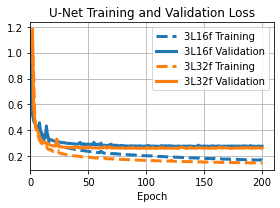

In [23]:
fig=plt.figure(figsize=(4,3))
ax=plt.axes()
colors=sns.color_palette()
for i,features in enumerate([16,32]):
    Ulevels=3
    DA_training_paras={'nens':1280,
                    'DA_method':'EnKF',
                    'Nx_DA':32,
                    'Nx_truth':128,
                    'obs_freq':10,
                    'obs_err':[1,-5,5,-7],
                    'DA_freq':10,
                    'save_B':False,
                    'nobs':[50,50],
                    'R_W':100,
                    'inflate':[1,0.45]}
    DA_training=DA.DA_exp(**DA_training_paras)
    ml_dir='/home/feiyul/PyQG/pyqg_experiments/examples/DA/ML/'+DA_training.file_name()
    stdout_file=glob('{}/{}L{}f/slurm-??????.out'.format(ml_dir,Ulevels,features))[0]
    print(stdout_file)
    with open(stdout_file) as f:
        for count, line in enumerate(f):
            pass
    print(count)
    with open(stdout_file) as f:
        train_loss=[float(line.split()[5][7:-1]) for line in f.readlines()[count-399::2]]
    with open(stdout_file) as f:
        valid_loss=[float(line.split()[2][7:-1]) for line in f.readlines()[count-398::2]]

    print(valid_loss)
    
    ax.plot(range(1,len(train_loss)+1),train_loss,color=colors[i],linestyle='--',linewidth=3,
            label='{}L{}f'.format(Ulevels,features)+' Training')
    ax.plot(range(1,len(train_loss)+1),valid_loss,color=colors[i],linestyle='-',linewidth=3,
            label='{}L{}f'.format(Ulevels,features)+' Validation')
    min_valid=min(valid_loss)
    max_valid=max(valid_loss)
    min_index=valid_loss.index(min_valid)
    print(min_valid,min_index+1,train_loss[min_index])
    print(valid_loss[-1],train_loss[-1])
    # ax.text(20,max_valid-0.2*(max_valid-min_valid),'Min:{}\nEpoch:{}'.format(min_valid,min_index+1),fontsize=12)

ax.set_xlim([0,None])
ax.set_xlabel('Epoch')
# ax.set_ylim([0.17,0.4])
ax.grid()
ax.legend()
ax.set_title('U-Net Training and Validation Loss')
fig.tight_layout()
fig.savefig('./plots/loss/Nx{}_{}_{}L{}F_200.png'.format(DA_training.Nx_DA,DA_training.file_name_short(),Ulevels,features))

/home/feiyul/PyQG/pyqg_experiments/examples/DA/ML/EnKF_Nx32_from_Nx128_ens1280_freq10_relax0.45_R100_nobs50_50_err1E-5_5E-7/2L32f/slurm-801858.out
454
[1.1677, 0.5673, 0.4471, 0.4207, 0.3948, 0.364, 0.3471, 0.3311, 0.3168, 0.3227, 0.3042, 0.2957, 0.294, 0.2891, 0.2857, 0.2853, 0.3266, 0.2831, 0.2829, 0.2905, 0.2864, 0.2751, 0.2741, 0.2757, 0.2709, 0.2717, 0.2753, 0.2688, 0.2689, 0.2657, 0.2682, 0.2674, 0.2668, 0.2639, 0.2739, 0.265, 0.2656, 0.2655, 0.2612, 0.268, 0.2703, 0.26, 0.2688, 0.265, 0.2593, 0.259, 0.2602, 0.2601, 0.2602, 0.2737, 0.2601, 0.2561, 0.2566, 0.2561, 0.2605, 0.259, 0.2614, 0.2565, 0.2559, 0.2629, 0.2575, 0.2586, 0.2567, 0.2548, 0.256, 0.2536, 0.2549, 0.2627, 0.257, 0.2576, 0.2547, 0.2549, 0.2594, 0.2576, 0.2546, 0.2556, 0.2543, 0.2553, 0.2615, 0.2547, 0.2544, 0.2538, 0.2566, 0.2575, 0.2524, 0.2596, 0.2523, 0.2533, 0.2554, 0.255, 0.2586, 0.2535, 0.253, 0.258, 0.2529, 0.2553, 0.2549, 0.2657, 0.2548, 0.2677, 0.2531, 0.2526, 0.2545, 0.2545, 0.2516, 0.2537, 0.2531, 0.2536

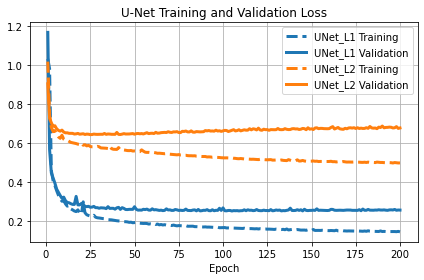

In [3]:
fig=plt.figure(figsize=(6,4))
ax=plt.axes()
colors=sns.color_palette()
obs_kwargs={'Nx_truth':128,'obs_freq':10,'obs_err':[1,-5,5,-7],'DA_freq':10,'save_B':False,'nobs':[50,50]}
DA_training_paras1={'nens':1280,'DA_method':'EnKF','Nx_DA':32,'R_W':100,'inflate':[1,0.45],**obs_kwargs}
DA_training_paras2={'nens':80,'DA_method':'EnKF','Nx_DA':32,'R_W':100,'inflate':[1,0.5],**obs_kwargs}

for i,(features,DA_paras,exp_str) in enumerate(zip([32,32],
                                                   [DA_training_paras1,DA_training_paras2],
                                                   ['UNet_L1','UNet_L2'])):
    Ulevels=2
    DA_training=DA.DA_exp(**DA_paras)
    ml_dir='/home/feiyul/PyQG/pyqg_experiments/examples/DA/ML/'+DA_training.file_name()
    stdout_file=glob('{}/{}L{}f/slurm-??????.out'.format(ml_dir,Ulevels,features))[0]
    print(stdout_file)
    with open(stdout_file) as f:
        for count, line in enumerate(f):
            pass
    print(count)
    with open(stdout_file) as f:
        train_loss=[float(line.split()[5][7:-1]) for line in f.readlines()[count-399::2]]
    with open(stdout_file) as f:
        valid_loss=[float(line.split()[2][7:-1]) for line in f.readlines()[count-398::2]]

    print(valid_loss)
    
    ax.plot(range(1,len(train_loss)+1),train_loss,color=colors[i],linestyle='--',linewidth=3,
            label=exp_str+' Training')
    ax.plot(range(1,len(train_loss)+1),valid_loss,color=colors[i],linestyle='-',linewidth=3,
            label=exp_str+' Validation')
    min_valid=min(valid_loss)
    max_valid=max(valid_loss)
    min_index=valid_loss.index(min_valid)
    print(min_valid,min_index+1,train_loss[min_index])
    print(valid_loss[-1],train_loss[-1])
    # ax.text(20,max_valid-0.2*(max_valid-min_valid),'Min:{}\nEpoch:{}'.format(min_valid,min_index+1),fontsize=12)

# ax.set_xlim([20,None])
ax.set_xlabel('Epoch')
# ax.set_ylim([0.17,0.4])
ax.grid()
ax.legend()
ax.set_title('U-Net Training and Validation Loss')
fig.tight_layout()
fig.savefig('./plots/loss/Nx{}_{}_{}L{}F_compare.png'.format(DA_training.Nx_DA,DA_training.file_name_short(),Ulevels,features))